This notebook demonstrates downloading triggered waveforms as ObsPy streams with the pystp module. 

First, import the STPClient class.

In [1]:
from pystp import STPClient
import datetime

%matplotlib inline

Connect to one of the STP servers by creating a new STPClient object and calling the `connect()` function.

In [2]:
stp = STPClient('stp3.gps.caltech.edu', 9999)
stp.connect()

	****************************************
	*   Welcome to the Southern California *
	*      Earthquake Data Center          *
	*     Seismic Transfer Program         *
        ****************************************

Please use the following citation:
 SCEDC (2013): Southern California Earthquake Data Center.
 Caltech.Dataset. doi:10.7909/C3WD3xH
to cite data downloaded from the SCEDC.

9/13/2019: Deployed a fix for a bug affecting WIN requests
in SAC and gap filled miniSEED outputs. If the requested
time window had its first block out of order in archival,
STP wrote the incorrect timestamp when writing out the data,
time shifting data compared to other components. The TRIG
output is not affected by this issue.



# Finding Events

The `get_events` function searches for events and returns a catalog. See Example Notebook 2 for details.

In [3]:
events = stp.get_events(times=[datetime.datetime(2019, 10, 17), datetime.datetime(2019, 10, 17, 23, 59, 59)], mags=[2, 4])

  39136904 eq  l 2019/10/17,04:29:13.340   35.6755   -117.4970   2.58  2.05  l 1.0
  39136912 eq  l 2019/10/17,04:34:21.370   35.9785   -117.3300   2.83  3.02  l 1.0
  39136936 eq  l 2019/10/17,04:56:06.780   35.6353   -117.4518   2.51  2.36  l 1.0
  39136984 eq  l 2019/10/17,05:29:41.100   35.8445   -117.4738   1.36  2.79  l 1.0
# Number of events= 4


In [4]:
events

4 Event(s) in Catalog:
2019-10-17T04:29:13.340000Z | +35.675, -117.497 | 2.05 ML
2019-10-17T04:34:21.370000Z | +35.978, -117.330 | 3.02 ML
2019-10-17T04:56:06.780000Z | +35.635, -117.452 | 2.36 ML
2019-10-17T05:29:41.100000Z | +35.844, -117.474 | 2.79 ML

Extract all the event IDs by getting a list of the `resource_id.id` for each event in the catalog.

In [5]:
evids = [ev.resource_id.id for ev in events]
evids

['39136904', '39136912', '39136936', '39136984']

# Downloading an ObsPy Stream

The `get_trig` function downloads waveforms triggered by events and either returns the waveforms as a dictionary of ObsPy streams with event IDs as keys, or leaves them on disk if the parameter `as_stream` is set to false. `as_stream` is true by default. Search parameters of `net` (network), `sta` (station), `chan` (SEED channel), `loc` (location code), and `radius` can be specified to only download data from certain stations or channels. "Blank blank" location codes should be passed in as "--". 

The next command downloads all waveforms from the CI network for event 38904823, the first element in the `evids` list, and returns them as an ObsPy stream in a dictionary.

In [6]:
waveforms = stp.get_trig([evids[0]], net='CI')

Processed 2304 waveform traces


`waveforms` is a dictionary that maps the event ID to an ObsPy stream.

In [7]:
waveforms

{'39136904': 2304 Trace(s) in Stream:

CI.CLC..BHE | 2019-10-17T04:28:34.296860Z - 2019-10-17T04:30:15.346860Z | 40.0 Hz, 4043 samples
...
(2302 other traces)
...
CI.BLY..HHZ | 2019-10-17T04:29:31.598394Z - 2019-10-17T04:31:01.828394Z | 100.0 Hz, 9024 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]}

ObsPy stream methods can be used to select traces from the stream and to do processing and plotting. The following line returns a new Stream that only contains data from CI.CLC.

In [8]:
waveforms['39136904'].select(network='CI', station='CLC')

9 Trace(s) in Stream:
CI.CLC..BHE | 2019-10-17T04:28:34.296860Z - 2019-10-17T04:30:15.346860Z | 40.0 Hz, 4043 samples
CI.CLC..BHN | 2019-10-17T04:28:39.071861Z - 2019-10-17T04:30:14.746861Z | 40.0 Hz, 3828 samples
CI.CLC..BHZ | 2019-10-17T04:28:41.571861Z - 2019-10-17T04:30:20.471861Z | 40.0 Hz, 3957 samples
CI.CLC..HHE | 2019-10-17T04:28:41.943130Z - 2019-10-17T04:30:14.893130Z | 100.0 Hz, 9296 samples
CI.CLC..HHN | 2019-10-17T04:28:43.623131Z - 2019-10-17T04:30:15.763131Z | 100.0 Hz, 9215 samples
CI.CLC..HHZ | 2019-10-17T04:28:45.963131Z - 2019-10-17T04:30:12.733131Z | 100.0 Hz, 8678 samples
CI.CLC..HNE | 2019-10-17T04:28:43.243131Z - 2019-10-17T04:30:12.233131Z | 100.0 Hz, 8900 samples
CI.CLC..HNN | 2019-10-17T04:28:43.873131Z - 2019-10-17T04:30:12.303131Z | 100.0 Hz, 8844 samples
CI.CLC..HNZ | 2019-10-17T04:28:39.873131Z - 2019-10-17T04:30:15.163131Z | 100.0 Hz, 9530 samples

The next command plots data from CI.CLC.

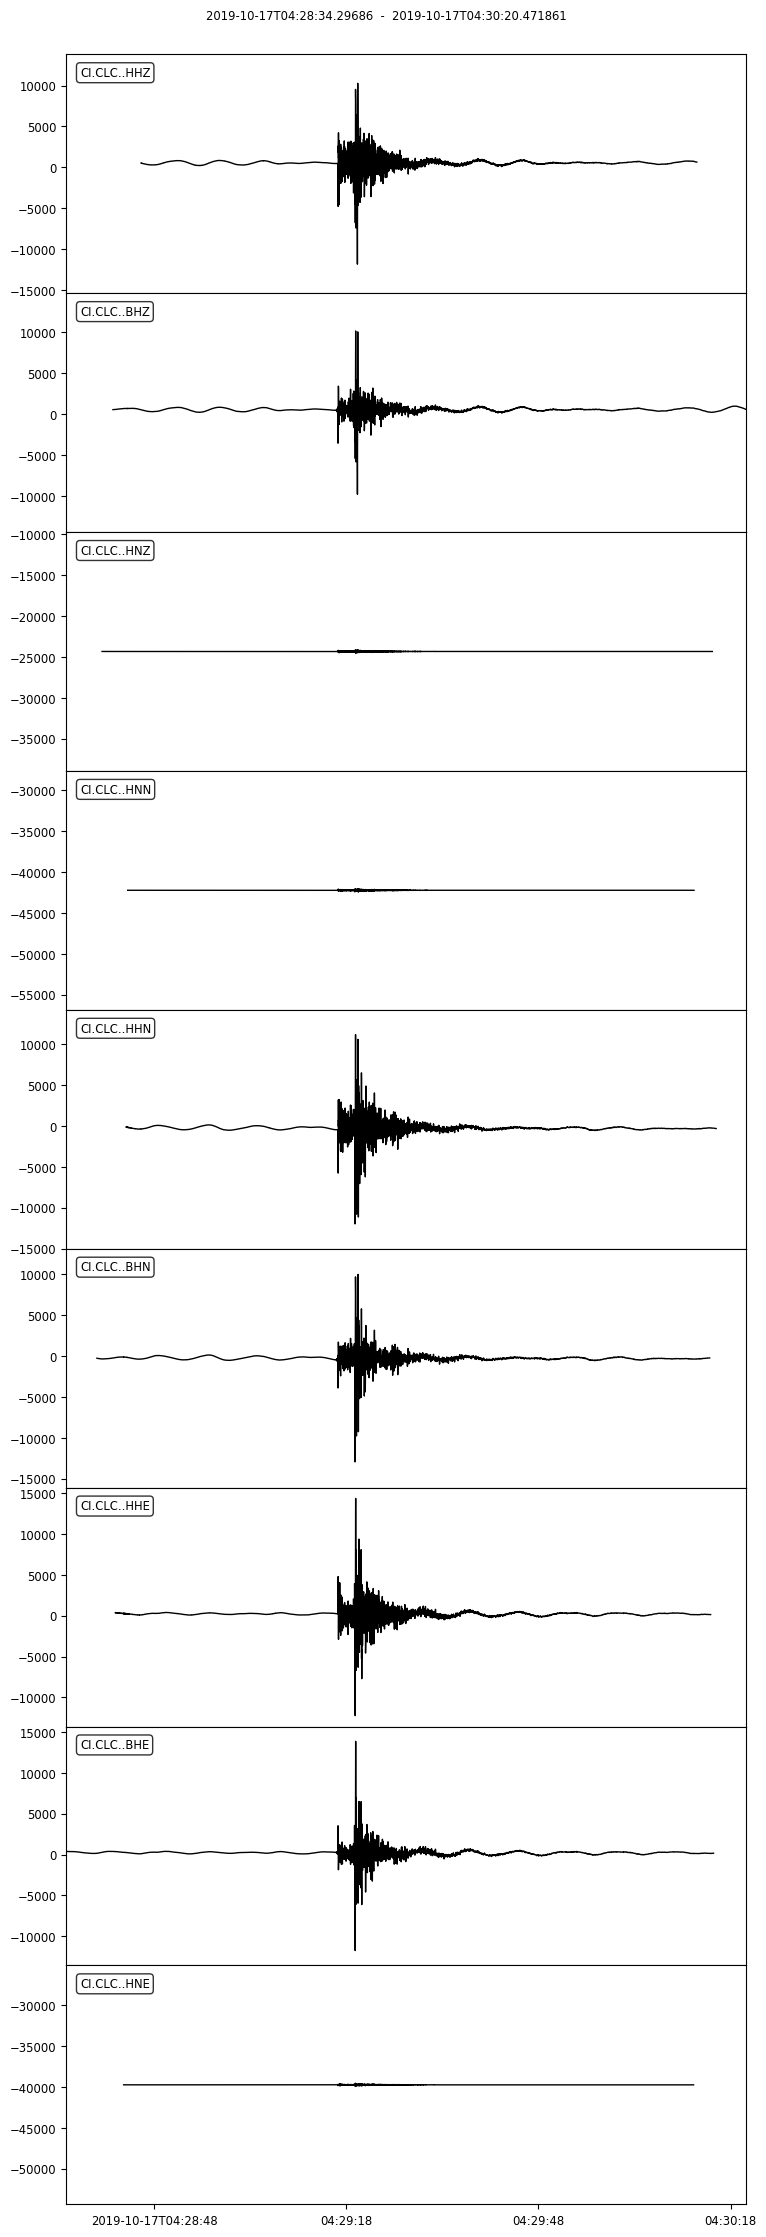

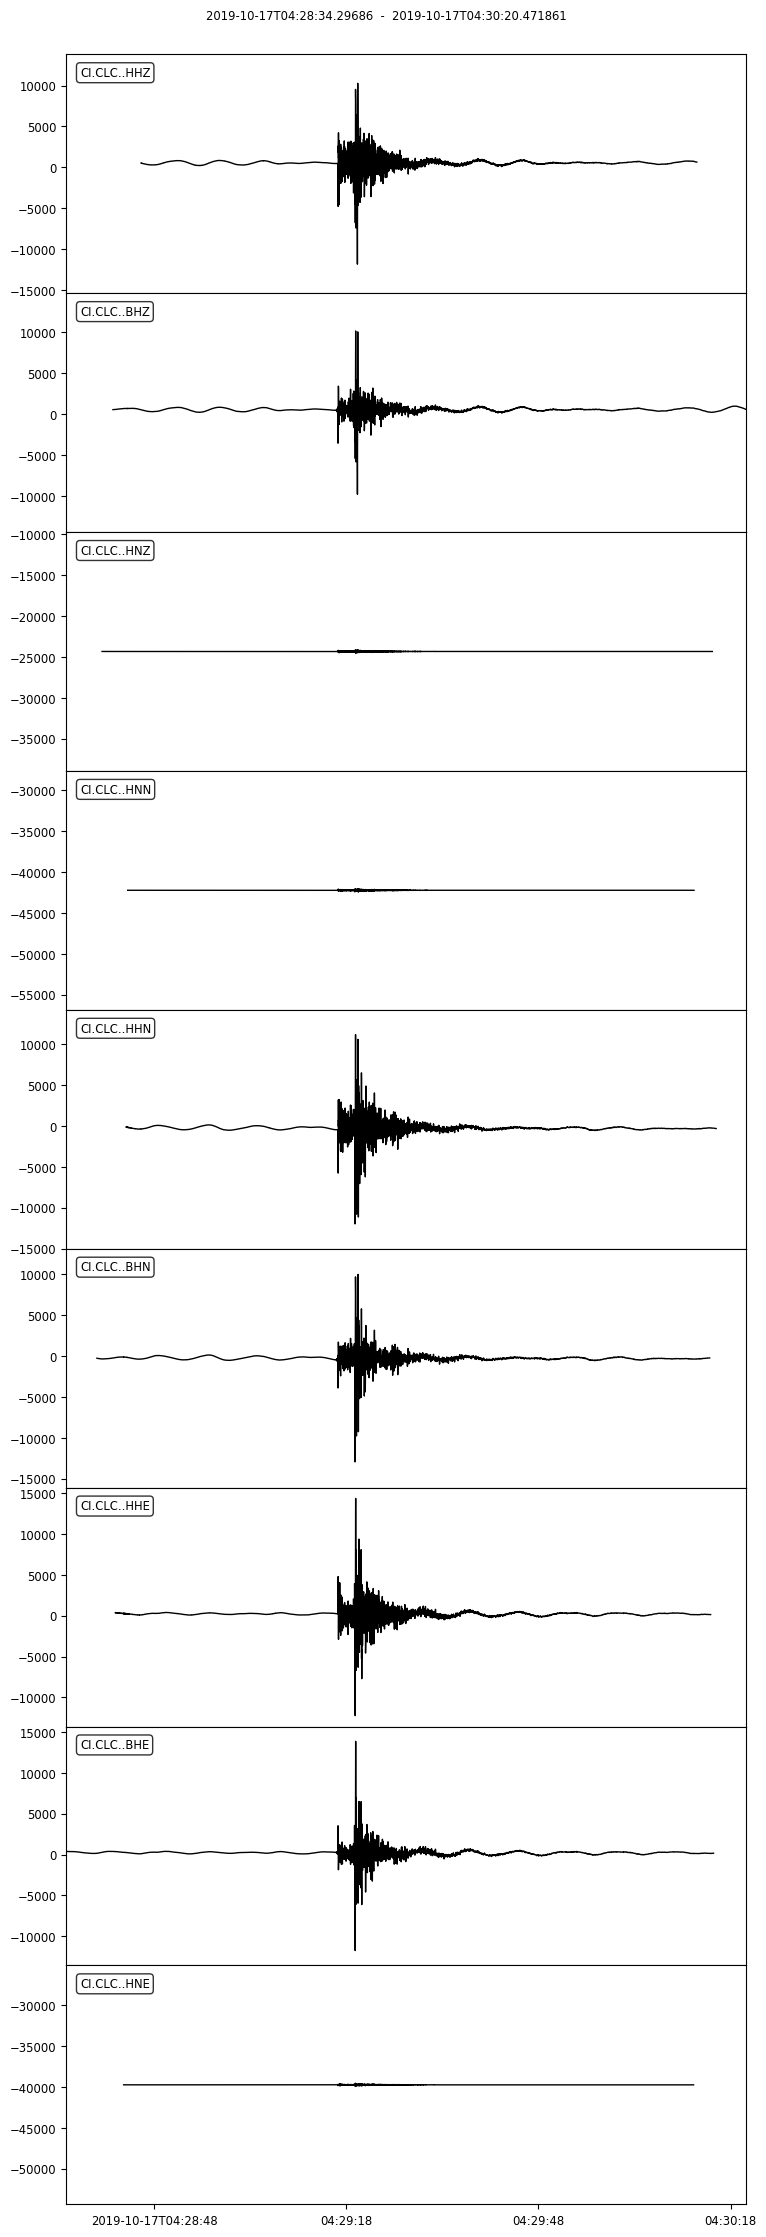

In [9]:
waveforms['39136904'].select(network='CI', station='CLC').plot()

# Downloading a Subset of Triggered Waveforms

The search parameters of `get_trig` are network, station, channel, location code, and distance (radius) from the origin. The Oracle wildcards '%' and '_' can be used in search parameters to represent anything or a single character. Blank-blank location codes should be replaced with "--".

In [10]:
# Get CI.CLC.BH channels with blank-blank location code.
waveforms = stp.get_trig([39136904], net='CI', sta='CLC', chan= 'BH_', loc='--')
waveforms

Processed 3 waveform traces


{39136904: 3 Trace(s) in Stream:
CI.CLC..BHE | 2019-10-17T04:28:34.296860Z - 2019-10-17T04:30:15.346860Z | 40.0 Hz, 4043 samples
CI.CLC..BHN | 2019-10-17T04:28:39.071861Z - 2019-10-17T04:30:14.746861Z | 40.0 Hz, 3828 samples
CI.CLC..BHZ | 2019-10-17T04:28:41.571861Z - 2019-10-17T04:30:20.471861Z | 40.0 Hz, 3957 samples}

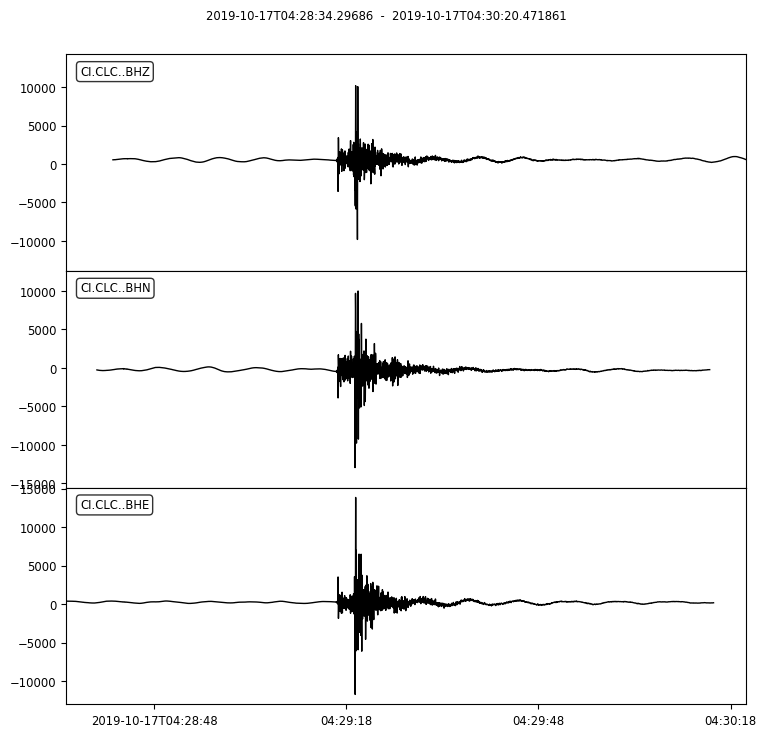

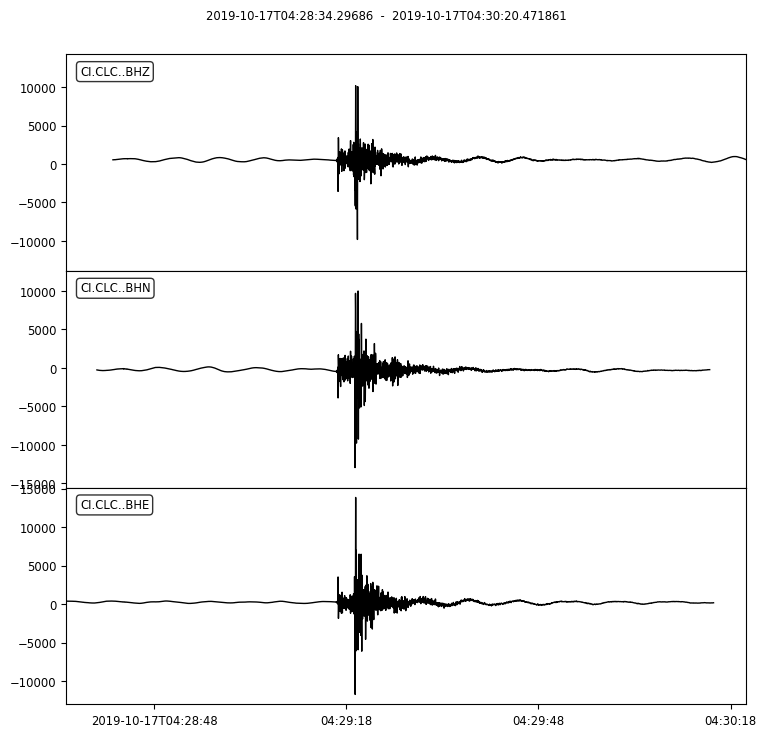

In [11]:
waveforms[39136904].plot()

When you are done, disconnect from the server.

In [12]:
stp.disconnect()